## Regresion Logistica

In [22]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones

# librerías de para implementar modelos de ciencia de datos
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Cargamos el dataset y realizamos exploración de datos.

In [24]:
#Cargamos el documento csv
info = pd.read_csv('D:\UNAD JERLY\SEMESTRE 6\ANALISIS DE DATOS\Unidad 2 - Tarea 3 - Algoritmos de Aprendizaje Supervisado/heart_cleveland_upload.csv')

In [26]:
#Cargamos los primeros 10 datos de la tabla
info.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [28]:
#descripción de datos
info.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Tratamos los datos, limpiando valores faltantes y atipicos.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

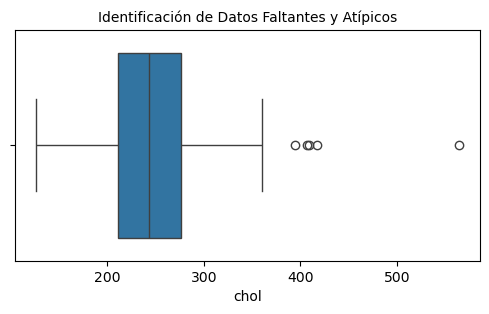

In [31]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=info['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

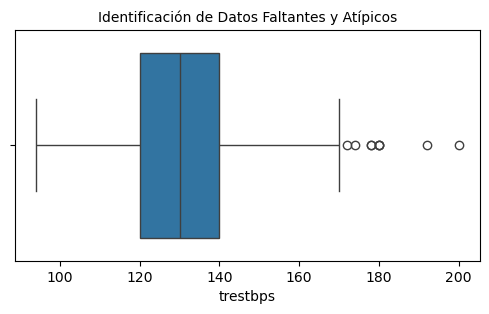

In [33]:
#Identificación de Datos Faltantes y Atípicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=info['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [35]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Presión arterial en reposo: ",info['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Colestoral sérico en mg/dl: ",info['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada: ",info['thalach'].isin([0]).sum())

Cantidad de Registros con cero en Presión arterial en reposo:  0
Cantidad de Registros con cero en Colestoral sérico en mg/dl:  0
Cantidad de Registros con cero en Frecuencia cardíaca máxima alcanzada:  0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

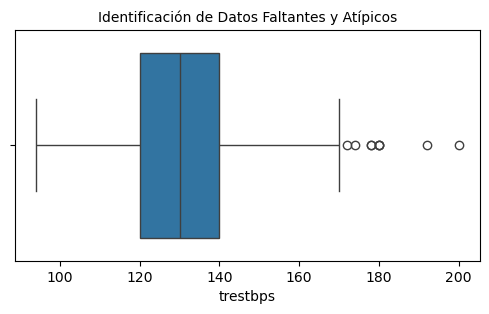

In [37]:
 #No existen valores en 0 en las columnas revisadas, continuamos con la revisión de datos atipicos.
#Revisión de datos atipicos
plt.figure(figsize=(6, 3))
sns.boxplot(x=info['trestbps'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [39]:
#Conteo de Datos Atípicos

nivel_minimo=90
nivel_maximo=170
Total_Atipicos=((info['trestbps']<nivel_minimo)|(info['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 9


In [41]:
# Filtra Datos Atípicos

info=info[(info['trestbps']<nivel_maximo)&(info['trestbps']>nivel_minimo)]

In [43]:
# Validar si se removieron los datos atípicos

Total_Atipicos=((info['trestbps']<nivel_minimo)|(info['trestbps']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

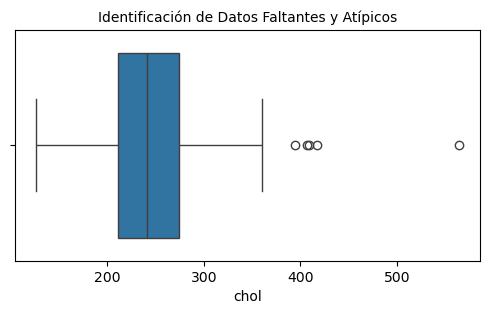

In [45]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=info['chol'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

In [47]:
#Conteo de Datos Atípicos

nivel_minimo=100
nivel_maximo=350
Total_Atipicos=((info['chol']<nivel_minimo)|(info['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 8


In [49]:
# Filtra Datos Atípicos

info=info[(info['chol']<nivel_maximo)&(info['chol']>nivel_minimo)]

# Validar si se removieron los datos atípicos

Total_Atipicos=((info['chol']<nivel_minimo)|(info['chol']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


## Seleccionamos las caracteristicas más relevantes para entrenar el modelo.

In [52]:
# Total de personas con enfermedad cardiaca.

info['condition'].value_counts()

condition
0    151
1    125
Name: count, dtype: int64

## Dividir los datos en train y test para evaluar correctamente el modelo

In [55]:
# Porcentaje de datos para entrenamiento (train) = 80% , y para prueba (test) = 20%

# Se crean variables X y Y para almacenar la información del entrenamiento

X = info.drop('condition',axis=1) # Se cargan los datos de train sin los datos de la columna Diabetico 
Y = info['condition'] # Se cargan los datos de train con los datos de la la columna Diabetico

#La función train_test_split crea una división de un conjunto de datos en dos bloques uno de entrenamiento y otro de prueba (train and test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y, random_state= 0)

In [57]:
print (X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
212   59    1   3       138   271    0        2      182      0      0.0   
44    54    0   1       132   288    1        2      159      1      0.0   
50    49    0   1       134   271    0        0      162      0      0.0   
258   52    1   3       125   212    0        0      168      0      1.0   
263   50    1   3       150   243    0        2      128      0      2.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
127   50    1   2       129   196    0        0      163      0      0.0   
94    60    0   2       102   318    0        0      160      0      0.0   
17    51    1   0       125   213    0        2      125      1      1.4   
184   63    1   3       140   187    0        2      144      1      4.0   
8     60    0   0       150   240    0        0      171      0      0.9   

     slope  ca  thal  
212      0   0     0  
44       0   1     0  
50       1   0    

In [59]:
print (Y_train)

212    0
44     0
50     0
258    1
263    1
      ..
127    0
94     0
17     0
184    1
8      0
Name: condition, Length: 220, dtype: int64


## Entrenar el modelo

In [62]:
# Construir el modelo de regresión logística 

modelo_regresion = LogisticRegression(solver = "liblinear") # liblinear es una libreria para resolver problemas lineales de clasificación y regresión
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test) # la función predict predice los valores a partir del conjunto de datos de validación

In [64]:
print (Prediccion)

[1 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0]


In [66]:
# Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score.
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        31
           1       0.84      0.84      0.84        25

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56



## Gráficas que permitan visualizar los resultados del modelo.

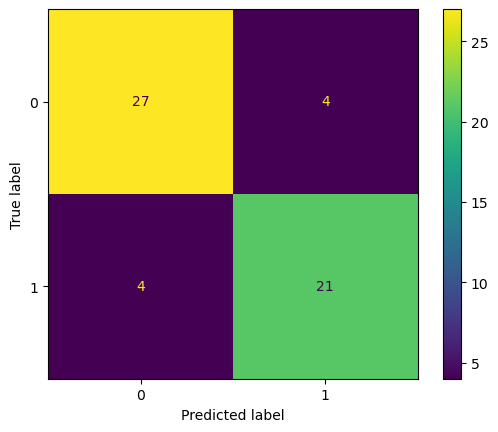

In [71]:
# Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

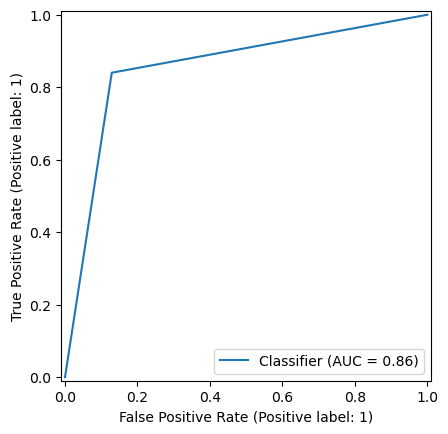

In [73]:
# Curva de precisón del modelo
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()